In [19]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# --- GENERAL ---

confidence_level = 0.95

# --- CLEANRL ---

cleanrl = {
    'data_frames': [pd.read_csv(file) for file in ['./logs/cleanrl/default/00.csv', './logs/cleanrl/default/01.csv', './logs/cleanrl/default/02.csv', './logs/cleanrl/default/03.csv', './logs/cleanrl/default/04.csv']]
}

#Make sure the wall time starts from 0
for df in cleanrl['data_frames']:
    df['Wall time'] -= df['Wall time'][0]

# Calculate the mean values
cleanrl['mean_values'] = pd.concat(cleanrl['data_frames']).groupby(level=0).mean()

# Calculate the upper and lower bounds for the confidence interval
cleanrl['std_values'] = pd.concat(cleanrl['data_frames']).groupby(level=0).std()
cleanrl['lower_bound'] = cleanrl['mean_values'] - 2 * cleanrl['std_values']
cleanrl['upper_bound'] = cleanrl['mean_values'] + 2 * cleanrl['std_values']

# --- RLLIB ---

rllib = {
    'data_frames': [pd.read_csv(file) for file in ['./logs/rllib/default/00.csv', './logs/rllib/default/01.csv', './logs/rllib/default/02.csv', './logs/rllib/default/03.csv', './logs/rllib/default/04.csv']]
}

#Make sure the wall time starts from 0
for df in rllib['data_frames']:
    df['Wall time'] -= df['Wall time'][0]

# Calculate the mean values
rllib['mean_values'] = pd.concat(rllib['data_frames']).groupby(level=0).mean()

# Calculate the upper and lower bounds for the confidence interval
rllib['std_values'] = pd.concat(rllib['data_frames']).groupby(level=0).std()
rllib['lower_bound'] = rllib['mean_values'] - 2 * rllib['std_values']
rllib['upper_bound'] = rllib['mean_values'] + 2 * rllib['std_values']

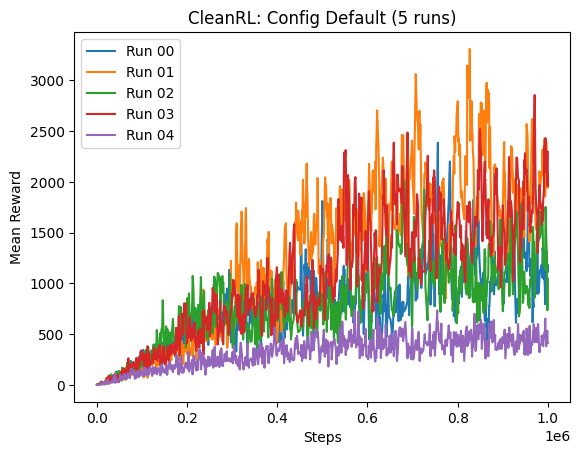

In [25]:
plt.plot(cleanrl['data_frames'][0]['Step'], cleanrl['data_frames'][0]['Value'], label="Run 00")
plt.plot(cleanrl['data_frames'][1]['Step'], cleanrl['data_frames'][1]['Value'], label="Run 01")
plt.plot(cleanrl['data_frames'][2]['Step'], cleanrl['data_frames'][2]['Value'], label="Run 02")
plt.plot(cleanrl['data_frames'][3]['Step'], cleanrl['data_frames'][3]['Value'], label="Run 03")
plt.plot(cleanrl['data_frames'][4]['Step'], cleanrl['data_frames'][4]['Value'], label="Run 04")
plt.xlabel("Steps")
plt.ylabel("Mean Reward")
plt.title("CleanRL: Config Default (5 runs)")
plt.legend(loc="upper left")
plt.show()

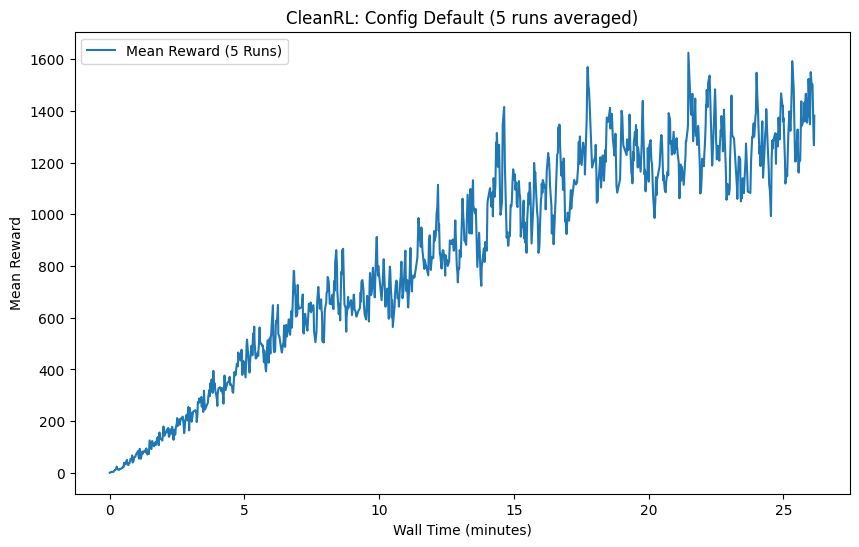

In [26]:
plt.figure(figsize=(10, 6))

# Plot the mean values
plt.plot(cleanrl['mean_values']['Wall time'] / 60, cleanrl['mean_values']['Value'], label='Mean Reward (5 Runs)')

# Add labels and title
plt.xlabel("Wall Time (minutes)")
plt.ylabel("Mean Reward")
plt.title("CleanRL: Config Default (5 runs averaged)")
plt.legend(loc="upper left")

# Show the plot
plt.show()

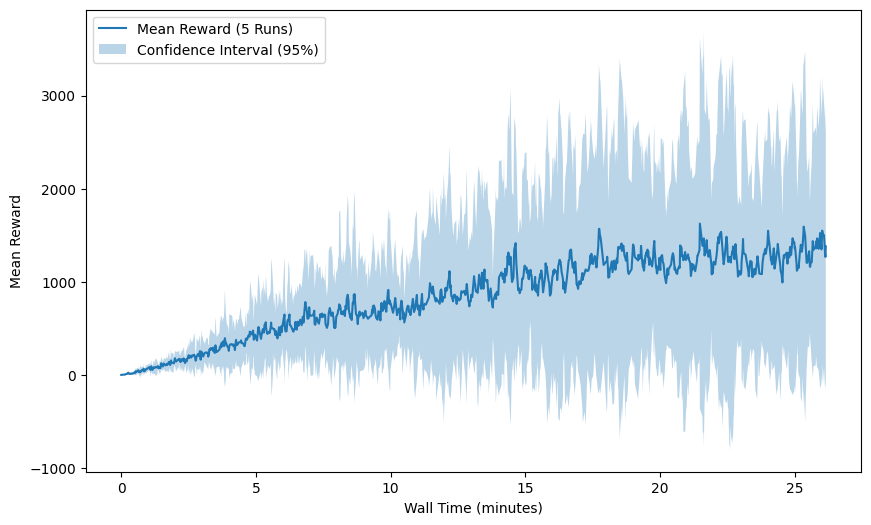

In [22]:
# Create a plot
plt.figure(figsize=(10, 6))

# Plot the mean values with confidence intervals
plt.plot(cleanrl['mean_values']['Wall time'] / 60, cleanrl['mean_values']['Value'], label='Mean Reward (5 Runs)')
plt.fill_between(cleanrl['mean_values']['Wall time'] / 60, cleanrl['lower_bound']['Value'], cleanrl['upper_bound']['Value'], alpha=0.3, label='Confidence Interval (95%)')

# Add labels and title
plt.xlabel("Wall Time (minutes)")
plt.ylabel("Mean Reward")
plt.title("CleanRL: Config Default (5 runs averaged + confidence interval)")
plt.legend(loc="upper left")

# Show the plot
plt.show()
